In [8]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

In [18]:
file = "../../../../../../dataframes/envipe/TMod_Vic/df_09_impute.csv"


In [19]:
df <- read.csv(file = file)
data <- df
head(data)

BP1_1,BP1_20,BP1_23,BP1_30,BP1_33,BP1_34,BP1_35,BP1_4,BP1_5,BPCOD,ESTRATO,BP1_3C
11,2,4,2,1,2000,0,3,6,5,2,9-2
12,2,7,2,1,300,0,3,6,5,2,9-2
11,2,8,2,1,500,0,1,1,5,3,9-2
12,2,3,2,1,5000,0,3,6,5,3,9-2
6,2,4,2,1,1500,0,2,1,5,3,9-2
99,2,4,2,5,4811678,3000704,2,2,9,2,9-2


In [20]:
ncol(data)

[1] 12

In [21]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [22]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
BP1_1,2.4988330
BP1_20,0.3298835
BP1_23,1.8184757
BP1_30,0.2199585
BP1_33,0.9465725
BP1_34,4.6573739


In [23]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
6,BP1_34,4.657374
12,BP1_3C,2.722899
1,BP1_1,2.498833
7,BP1_35,2.146855
10,BPCOD,2.046298
3,BP1_23,1.818476


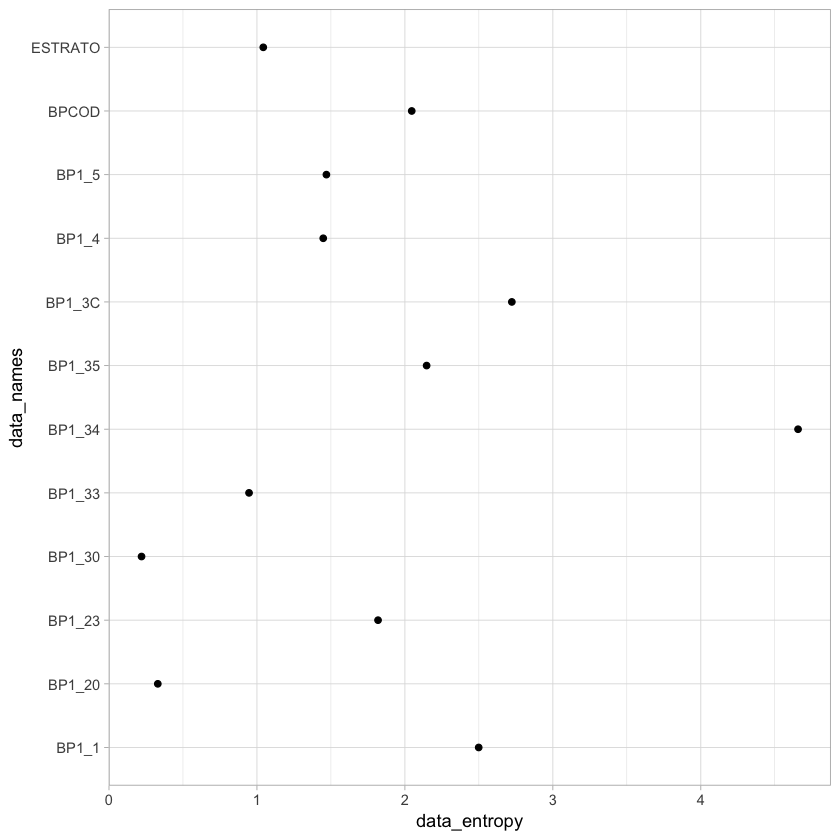

In [24]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

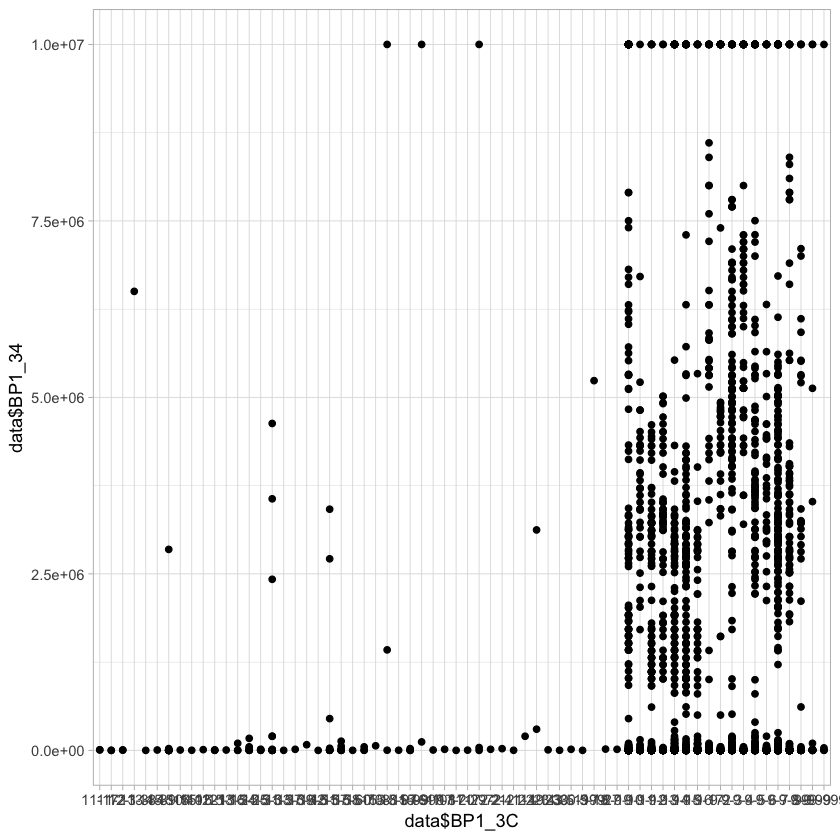

In [25]:
ggplot(data = data, 
       aes(y=data$BP1_34, 
           x=data$BP1_3C)) + geom_point() + theme_light()

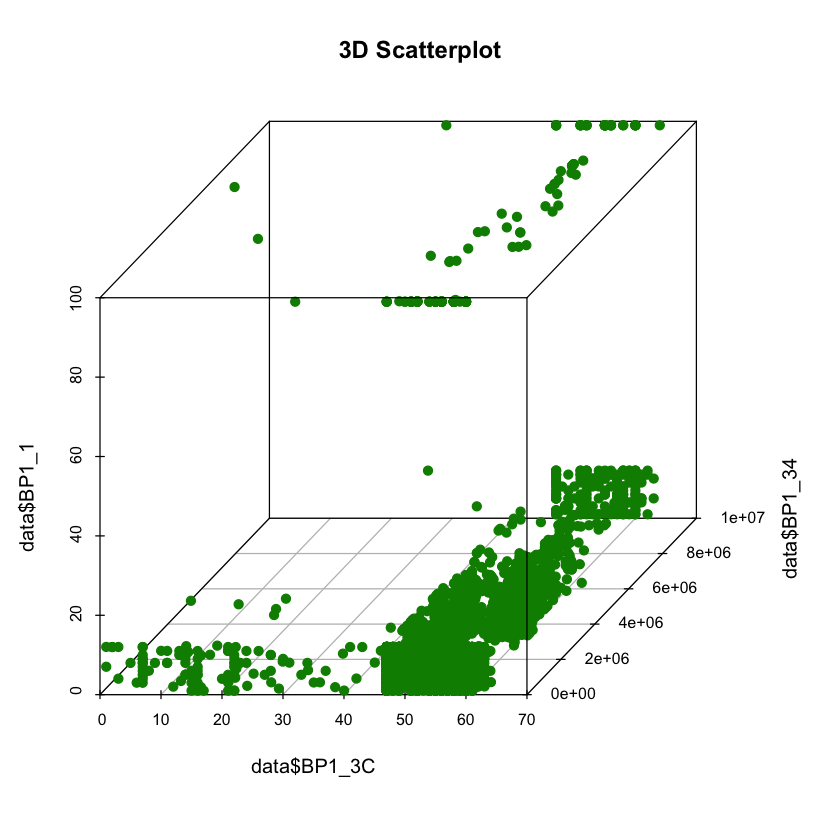

In [27]:
scatterplot3d(y=data$BP1_34, 
              x=data$BP1_3C,
              z=data$BP1_1, pch = 19, color = "green4", main="3D Scatterplot")





In [28]:
file = "../../../../../../dataframes/envipe/TMod_Vic/df_09_og_mixed.csv"


In [30]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
